In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

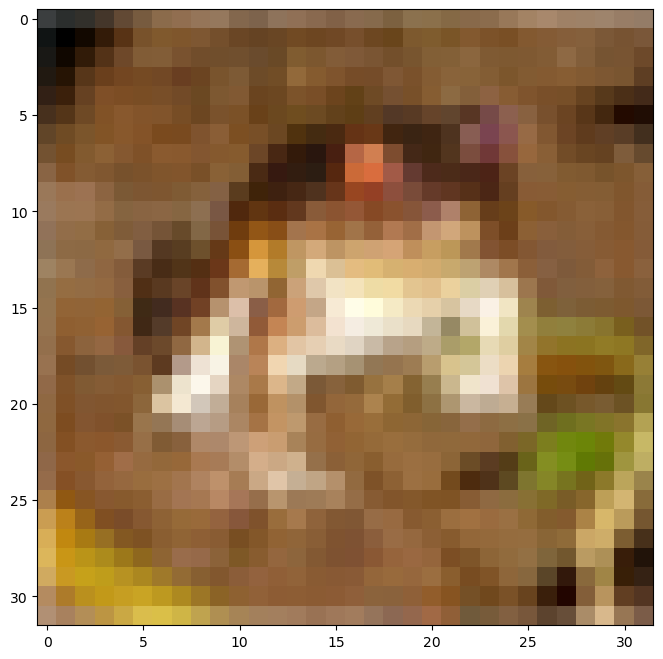

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(X_train[0])
plt.show()

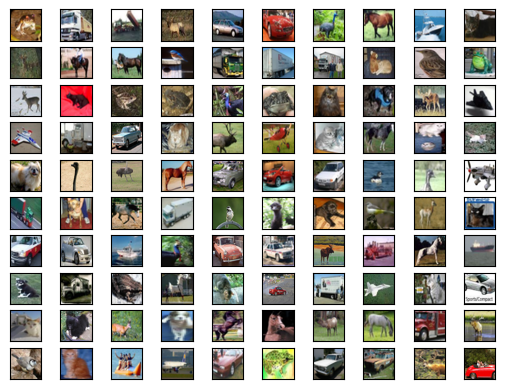

In [9]:
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [10]:
# Normalization of the data
X_train = X_train / 255.0

X_test = X_test / 255.0

In [11]:
# Converted labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
# Defined the model architecture
ann = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiled the model with Adam optimizer, categorical crossentropy loss, and accuracy metrics
ann.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
# Defined a custom callback for calculating precision, recall, and F1-score metrics on validation data
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.validation_data[0])
        y_pred_classes = y_pred.argmax(axis=1)
        y_true = self.validation_data[1].argmax(axis=1)

        precision = precision_score(y_true, y_pred_classes, average='weighted')
        recall = recall_score(y_true, y_pred_classes, average='weighted')
        f1 = f1_score(y_true, y_pred_classes, average='weighted')

        print(f' - precision: {precision:.4f} - recall: {recall:.4f} - f1: {f1:.4f}')

In [14]:
# Trained the model on training data for 10 epochs, validating on test data with custom metrics callback
metrics_callback = MetricsCallback(validation_data=(X_test, y_test))
history = ann.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[metrics_callback])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step   - acc
 - precision: 0.5416 - recall: 0.5369 - f1: 0.5280
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3440 - loss: 1.7700 - val_accuracy: 0.5369 - val_loss: 1.2973
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step p - accuracy
 - precision: 0.6160 - recall: 0.5981 - f1: 0.5895
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5616 - loss: 1.2338 - val_accuracy: 0.5981 - val_loss: 1.1326
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step p - accuracy
 - precision: 0.6564 - recall: 0.6360 - f1: 0.6392
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6229 - loss: 1.0638 - val_accuracy: 0.6360 - val_loss: 1.0211
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step p - accura
 - precision: 0.6604 - recall: 0.6538 - f1: 0.6526
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6541 - loss: 0.9675 - val_accuracy: 0.6538 - val_loss: 0.9813
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step p - accuracy
 

In [15]:
y_pred = ann.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Printed classification report with target class names
print(classification_report(y_true, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))

              precision    recall  f1-score   support

    airplane       0.84      0.58      0.69      1000
  automobile       0.84      0.80      0.82      1000
        bird       0.59      0.57      0.58      1000
         cat       0.54      0.44      0.48      1000
        deer       0.56      0.71      0.63      1000
         dog       0.63      0.60      0.62      1000
        frog       0.56      0.90      0.69      1000
       horse       0.77      0.69      0.73      1000
        ship       0.80      0.82      0.81      1000
       truck       0.86      0.72      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



In [17]:
import matplotlib.pyplot as plt
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: dog
Actual class: dog


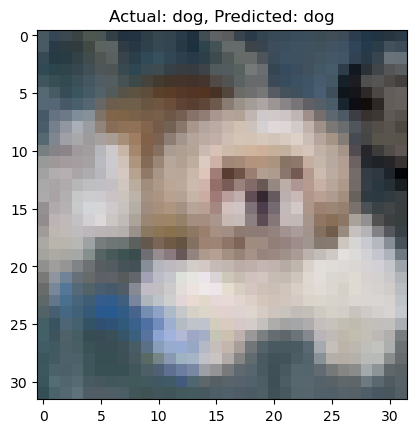

In [19]:
# Specify the index of the image you want to test from the test set
index = int(input("Enter the index of the image to test:"))

# Retrieve the test image and its corresponding label
test_image = X_test[index]
test_label = y_test[index]

# Make a prediction using the model
prediction = ann.predict(np.expand_dims(test_image, axis=0))
predicted_class = np.argmax(prediction)

# Print the results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'Predicted class: {class_names[predicted_class]}')
print(f'Actual class: {class_names[np.argmax(test_label)]}')

# Visualize the image
plt.imshow(test_image)
plt.title(f'Actual: {class_names[np.argmax(test_label)]}, Predicted: {class_names[predicted_class]}')
plt.show()
